# Data Pre-Processing

#### Import Packages and CSV

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
# Create Dataframe
df = pd.read_csv(r"heart_disease_uci.csv")
# Print shape of dataset
print(df.shape)

(920, 16)


## Data Cleaning

### Handling Missing values

* Handling Missing values 
* Handling Duplicates
* Check data type
* Understand the dataset

#### Check Null Values

In [77]:
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

trestbps 6.41304 % missing values
chol 3.26087 % missing values
fbs 9.78261 % missing values
restecg 0.21739 % missing values
thalch 5.97826 % missing values
exang 5.97826 % missing values
oldpeak 6.73913 % missing values
slope 33.58696 % missing values
ca 66.41304 % missing values
thal 52.82609 % missing values


Remove Missing value

In [78]:

# Load your dataframe (replace with your actual data)
# df = pd.read_csv('your_data.csv') 

# Step 1: Drop columns with high missing value percentages
df = df.drop(['ca', 'thal'], axis=1)

# Step 2: Impute moderate percentage missing values with KNNImputer
num_cols = ['trestbps', 'chol', 'thalch', 'oldpeak']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

cat_cols = ['fbs', 'restecg', 'exang', 'slope']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
# df.isnull().sum()


# Verify missing values have been removed
print(df.isnull().sum())

# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)



id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64


* **There are no null values in the dataset**

**Remove some column from the dataset as it cannot used in Model Training**

*Drop column which is not necessary now .*

In [ ]:

df.drop('id', inplace=True, axis=1)
df.drop('dataset', inplace=True, axis=1)
df.drop('fbs', inplace=True, axis=1)
df.drop('chol', inplace=True, axis=1)
# df.drop('ca', inplace=True, axis=1)
# df.drop('thal', inplace=True, axis=1)

**add new column from num to heart_disease_labels (target column)**

In [ ]:

# # Suppose your DataFrame is named df and has a column 'num'
# # e.g. df['num'] = [0, 1, 2, 3, 4, 1, 0, 3, ...]

# # Define the mapping dictionary
# heart_disease_labels = {
#     0: "No heart disease",
#     1: "Mild heart disease",
#     2: "Moderate heart disease",
#     3: "Severe heart disease",
#     4: "High-risk heart disease"
# }

# # Create a new column using the mapping
# df['heart_disease_labels'] = df['num'].map(heart_disease_labels)

# # Check the result
# print(df[['num', 'heart_disease_labels']].head())


   num    heart_disease_labels
0    0        No heart disease
1    2  Moderate heart disease
2    1      Mild heart disease
3    0        No heart disease
4    0        No heart disease


In [80]:
df.head()

,age,sex,cp,trestbps,restecg,thalch,exang,oldpeak,slope,num
0,63,Male,typical angina,145.0,lv hypertrophy,150.0,False,2.3,downsloping,0
1,67,Male,asymptomatic,160.0,lv hypertrophy,108.0,True,1.5,flat,2
2,67,Male,asymptomatic,120.0,lv hypertrophy,129.0,True,2.6,flat,1
3,37,Male,non-anginal,130.0,normal,187.0,False,3.5,downsloping,0
4,41,Female,atypical angina,130.0,lv hypertrophy,172.0,False,1.4,upsloping,0


dro column num

In [ ]:
# df.drop('num', inplace=True, axis=1)

For numerical features Use the median for skewed data

### 3.2 Other Data Cleaning steps

**Handling Duplicates**

In [81]:
df.duplicated().sum()

np.int64(3)

If you want to see those duplicate rows:

In [82]:
df[df.duplicated()]

,age,sex,cp,trestbps,restecg,thalch,exang,oldpeak,slope,num
405,49,Female,atypical angina,110.0,normal,160.0,False,0.0,flat,0
883,69,Male,asymptomatic,130.0,st-t abnormality,140.0,False,0.5,flat,3
907,58,Male,non-anginal,150.0,st-t abnormality,118.0,True,0.0,flat,2


**✅ To remove them:**

In [83]:
df = df.drop_duplicates()

In [84]:
df.duplicated().sum()

np.int64(0)

* **No Duplicates in the dataset**

# Feature Engineering

## Feature Extraction

In [85]:
df.head()

,age,sex,cp,trestbps,restecg,thalch,exang,oldpeak,slope,num
0,63,Male,typical angina,145.0,lv hypertrophy,150.0,False,2.3,downsloping,0
1,67,Male,asymptomatic,160.0,lv hypertrophy,108.0,True,1.5,flat,2
2,67,Male,asymptomatic,120.0,lv hypertrophy,129.0,True,2.6,flat,1
3,37,Male,non-anginal,130.0,normal,187.0,False,3.5,downsloping,0
4,41,Female,atypical angina,130.0,lv hypertrophy,172.0,False,1.4,upsloping,0


### Type of Features

**Numeric Features**

In [93]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 6


**Categorical Features**

In [87]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 4


**Discrete features**

In [88]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 2


**Continues Features**

In [89]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 4


### Split X and Y

* **Split Dataframe to X and y**
* **Here we set a variable X i.e, independent columns, and a variable y i.e, dependent column as the “Case_Status” column.**


In [90]:
# X = df.drop('heart_disease_labels', axis=1)
# y = df['heart_disease_labels']
X = df.drop('num', axis=1)
y = df['num']

In [91]:
y.head()

0    0
1    2
2    1
3    0
4    0
Name: num, dtype: int64

**Manual encoding target column**

In [ ]:
# If the target column has Denied it is encoded as 1 others as 0
# y= np.where(y=='Denied', 1,0)

In [100]:
y

0      0
1      2
2      1
3      0
4      0
      ..
915    1
916    0
917    2
918    0
919    1
Name: num, Length: 917, dtype: int64

In [ ]:
# # Show only numerical column names
# num_cols = df.select_dtypes(include=['int64', 'float64']).columns
# print(num_cols)

Index(['age', 'trestbps', 'thalch', 'oldpeak', 'num'], dtype='object')


## Feature Transformation

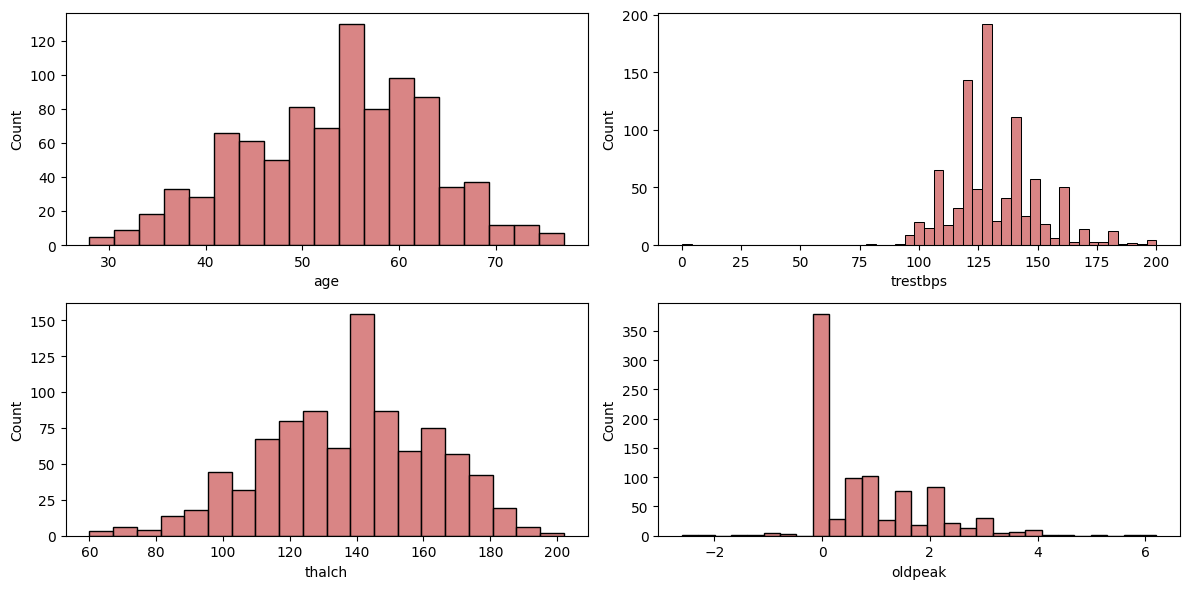

In [106]:
# distribution of data before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(['age','trestbps','thalch','oldpeak']):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

* No of employees and Copmany age column is skewed
* Apply a power transform featurewise to make data more Gaussian-like.

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform.

**Checking Skewness**

**What is Skewness ?**

* Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. A normal distribution has a skew of zero

In [107]:
# Check Skewness
X[continuous_features].skew(axis=0, skipna=True)

age        -0.196163
trestbps    0.242742
thalch     -0.234773
oldpeak     1.130289
dtype: float64

- Positiviely Skewed : company_age, no_of_employees.
- We can handle outliers and then check the skewness.

## Apply Power Transformer to Check if it can reduces the outliers

In [108]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
transform_features = ['oldpeak']
X_copy = pt.fit_transform(X[transform_features])

In [109]:
X_copy = pd.DataFrame(X_copy, columns=transform_features)

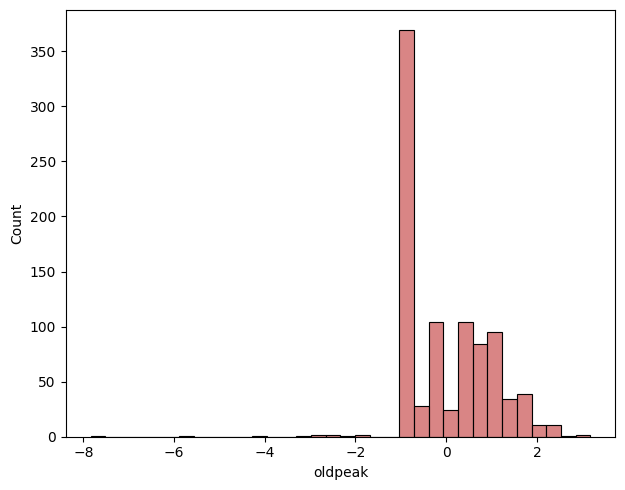

In [110]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(transform_features):
    plt.subplot(1, 2, i+1)
    sns.histplot(x=X_copy[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

**Checking Skewness**

In [111]:
X_copy.skew(axis=0, skipna=True)

oldpeak   -0.349066
dtype: float64

- Here Yeo-Johnson is used and it supports both positive or negative data for transformation.
- So Power Transformer with yeo-johnson can be used.

In [112]:
for feature in cat_features:
    print(feature,':', df[feature].nunique())

sex : 2
cp : 4
restecg : 3
slope : 3


## Feature Encoding and Scaling

 **One Hot Encoding for Columns which had lesser unique values and not ordinal**
* One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

**Ordinal Encoding for Columns which has many unique categories** 
* Ordinal encoding is used here as label encoder is supported for column transformer.
* Ordinal encoding is used for Ordinal Variable. Variable comprises a finite set of discrete values with a ranked ordering between values.

**Standard Scaler** 
* Standardize features by removing the mean and scaling to unit variance.

**Power Transformer**
* Power transforms are a technique for transforming numerical input or output variables to have a Gaussian or more-Gaussian-like probability distribution.

**Selecting number features for preprocessing**

In [113]:
num_features = list(X.select_dtypes(exclude="object").columns)

In [114]:
num_features

['age', 'trestbps', 'thalch', 'exang', 'oldpeak']

In [115]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_cols.tolist())

Categorical Columns: ['sex', 'cp', 'restecg', 'slope']


### **Preprocessing using Column Transformer**
we will do sklearn pipe-line to transform 

In [116]:
# Create Column Transformer with 3 types of transformers
or_columns = ['cp','restecg','slope',]
oh_columns = ['sex']
transform_columns= ['age','trestbps','thalch','exang','oldpeak']

from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, oh_columns),
        ("Ordinal_Encoder", ordinal_encoder, or_columns),
        ("Transformer", transform_pipe, transform_columns),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [117]:
X = preprocessor.fit_transform(X)

In [118]:
X

array([[ 0.        ,  1.        ,  3.        , ...,  0.4895166 ,
        -0.7604691 ,  1.36480808],
       [ 0.        ,  1.        ,  0.        , ..., -1.18024181,
         1.31497782,  0.60893974],
       [ 0.        ,  1.        ,  0.        , ..., -0.34536261,
         1.31497782,  1.64825871],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -1.49829103,
        -0.7604691 , -0.80831341],
       [ 0.        ,  1.        ,  0.        , ...,  0.09195507,
        -0.7604691 , -0.33589569],
       [ 0.        ,  1.        ,  1.        , ..., -1.7765841 ,
         1.31497782, -0.80831341]], shape=(917, 15))

# Classification
*with hanldle imblance data but ther is another upsampling,downsampling etc, but we use minority* 

In [121]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

## Train Test Split
- The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

- It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms.

In [151]:
from sklearn.preprocessing import LabelEncoder

# Encode labels to consecutive integers
le = LabelEncoder()
y_res_encoded = le.fit_transform(y_res)  # [0,1,4] -> [0,1,2]

# Check mapping
print(dict(zip(le.classes_, range(len(le.classes_)))))
# Output example: {0:0, 1:1, 4:2}


{np.int64(0): 0, np.int64(1): 1, np.int64(4): 2}


In [152]:
from sklearn.model_selection import train_test_split

# Ensure y is 1D and encoded
y_res_encoded = y_res_encoded.ravel()  # shape (n_samples,)

# Split using encoded y
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res_encoded, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((484, 15), (122, 15), (484,), (122,))

*now we will do model train*

In [153]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [154]:
# def evaluate_clf(true, predicted):
#     acc = accuracy_score(true, predicted) # Calculate Accuracy
#     f1 = f1_score(true, predicted) # Calculate F1-score
#     precision = precision_score(true, predicted) # Calculate Precision
#     recall = recall_score(true, predicted)  # Calculate Recall
#     roc_auc = roc_auc_score(true, predicted) #Calculate Roc
#     return acc, f1 , precision, recall, roc_auc

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

def evaluate_clf(true, predicted):
    true = true.ravel()        # ensure 1D
    predicted = predicted.ravel()
    
    acc = accuracy_score(true, predicted)
    avg = 'weighted' if len(set(true)) > 2 else 'binary'
    
    f1 = f1_score(true, predicted, average=avg)
    precision = precision_score(true, predicted, average=avg)
    recall = recall_score(true, predicted, average=avg)
    
    if len(set(true)) > 2:
        roc_auc = roc_auc_score(pd.get_dummies(true), pd.get_dummies(predicted), average='weighted', multi_class='ovr')
    else:
        roc_auc = roc_auc_score(true, predicted)
        
    return acc, f1, precision, recall, roc_auc

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}

In [156]:



# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

## Model Training 

In [158]:
# base_model_report =evaluate_models(X=X_res, y=y_res, models=models)
base_model_report = evaluate_models(X=X_res, y=y_res_encoded, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9754
- F1 score: 0.9751
- Precision: 0.9756
- Recall: 0.9754
- Roc Auc Score: 0.9736


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9836
- F1 score: 0.9833
- Precision: 0.9838
- Recall: 0.9836
- Roc Auc Score: 0.9836


Gradient Boosting
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9836
- F1 score: 0.9833
- Precision: 0.9838
- Recall: 0.9836
- Roc Auc Score: 0.9836


Logistic Regression
Model performance for Training 

**Results of All Models**

In [159]:
base_model_report

,Model Name,Accuracy
7,Support Vector Classifier,0.991803
6,CatBoosting Classifier,0.991803
5,XGBClassifier,0.983607
1,Decision Tree,0.983607
2,Gradient Boosting,0.983607
4,K-Neighbors Classifier,0.983607
0,Random Forest,0.975410
3,Logistic Regression,0.975410
8,AdaBoost Classifier,0.967213


**Here we can use Support Vector Classifier for Hyper Parameter Tuning**

**Define the parameter distribution for Random forest**

In [160]:
#Initialize few parameter for Hyperparamter tuning
svc_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

catboost_params = {
    'depth': [4,6,8],
    'learning_rate': [0.01, 0.1, 0.2],
    'iterations': [100, 200]
}

xgboost_params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}
decisiontree_params = {
    'max_depth': [3,5,7,None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

# from sklearn.model_selection import GridSearchCV


# 1️⃣ Define models and parameter grids
# models = {
#     'SVC': SVC(probability=True, random_state=42),
#     'CatBoost': CatBoostClassifier(verbose=0, random_state=42),
#     'XGB': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
#     'DecisionTree': DecisionTreeClassifier(random_state=42)
# }

# params = {
#     'SVC': {
#         'C': [0.1, 1, 10],
#         'kernel': ['linear', 'rbf'],
#         'gamma': ['scale', 'auto']
#     },
#     'CatBoost': {
#         'depth': [4,6,8],
#         'learning_rate': [0.01, 0.1, 0.2],
#         'iterations': [100, 200]
#     },
#     'XGB': {
#         'max_depth': range(3,10,2),        # 3,5,7,9
#         'min_child_weight': range(1,6,2)   # 1,3,5
#     },
#     'DecisionTree': {
#         'max_depth': [3,5,7,None],
#         'min_samples_split': [2,5,10],
#         'min_samples_leaf': [1,2,4]
#     }
# }

# def tune_models(X, y, models, params):
#     tuned_models = {}
#     for name in models.keys():
#         print(f"\nTuning {name} ...")
#         grid = GridSearchCV(
#             estimator=models[name],
#             param_grid=params[name],
#             scoring='accuracy',
#             cv=5,            # 5-fold cross-validation
#             n_jobs=-1
#         )
#         grid.fit(X, y)
#         print(f"Best params for {name}: {grid.best_params_}")
#         print(f"Best CV Accuracy for {name}: {grid.best_score_:.4f}")
#         tuned_models[name] = grid.best_estimator_
#     return tuned_models

# # 3️⃣ Run tuning
# tuned_models = tune_models(X_res, y_res_encoded, models, params)

In [162]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# Models list for Hyperparameter tuning
randomcv_models = [
    ("SVC", SVC(), svc_params),
    ("CatBoost", CatBoostClassifier(), catboost_params),
    ('XGBoost', XGBClassifier(), xgboost_params),
    ('DecisionTree', DecisionTreeClassifier(), decisiontree_params)
    
    
]

**Create a function for model training and report which can be used in hyperparameter tuning loop**

In [164]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(X_res, y_res_encoded)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.1s[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s

[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.1s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=scale, k

In [166]:
model_param

{'SVC': {'kernel': 'linear', 'gamma': 'scale', 'C': 10},
 'CatBoost': {'learning_rate': 0.2, 'iterations': 200, 'depth': 4},
 'XGBoost': {'min_child_weight': 3, 'max_depth': 3},
 'DecisionTree': {'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_depth': 7}}

## Retraining the Model with best Parameters

In [168]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Support Vector Classifier": SVC(**model_param['SVC']),
    "CatBoosting Classifier	": CatBoostClassifier(**model_param['CatBoost']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost'],n_jobs=-1),
    "DecisionTree": DecisionTreeClassifier(**model_param['DecisionTree']),
}
tuned_report =evaluate_models(X=X_res, y=y_res_encoded, models=best_models)

Support Vector Classifier
Model performance for Training set
- Accuracy: 0.9793
- F1 score: 0.9768
- Precision: 0.9799
- Recall: 0.9793
- Roc Auc Score: 0.9723
----------------------------------
Model performance for Test set
- Accuracy: 0.9836
- F1 score: 0.9821
- Precision: 0.9840
- Recall: 0.9836
- Roc Auc Score: 0.9800


0:	learn: 0.8397995	total: 6.62ms	remaining: 1.32s
1:	learn: 0.6854422	total: 15.1ms	remaining: 1.49s
2:	learn: 0.5759966	total: 22.2ms	remaining: 1.46s
3:	learn: 0.4826489	total: 26.5ms	remaining: 1.3s
4:	learn: 0.4200310	total: 31.9ms	remaining: 1.24s
5:	learn: 0.3727605	total: 37.5ms	remaining: 1.21s
6:	learn: 0.3349640	total: 42.4ms	remaining: 1.17s
7:	learn: 0.3066791	total: 49ms	remaining: 1.18s
8:	learn: 0.2788571	total: 53.9ms	remaining: 1.14s
9:	learn: 0.2506390	total: 64.2ms	remaining: 1.22s
10:	learn: 0.2253073	total: 78.5ms	remaining: 1.35s
11:	learn: 0.2089712	total: 88ms	remaining: 1.38s
12:	learn: 0.1939935	total: 98.3ms	remaining: 1.41s
13:	learn: 0

In [169]:
tuned_report

,Model Name,Accuracy
1,CatBoosting Classifier\t,0.991803
0,Support Vector Classifier,0.983607
2,XGBClassifier,0.983607
3,DecisionTree,0.983607


In [170]:
best_model = CatBoostClassifier(**model_param['CatBoost'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'CatBoost'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

0:	learn: 0.8397995	total: 16.4ms	remaining: 3.26s
1:	learn: 0.6854422	total: 23.1ms	remaining: 2.28s
2:	learn: 0.5759966	total: 29.4ms	remaining: 1.93s
3:	learn: 0.4826489	total: 35ms	remaining: 1.71s
4:	learn: 0.4200310	total: 39.8ms	remaining: 1.55s
5:	learn: 0.3727605	total: 47.4ms	remaining: 1.53s
6:	learn: 0.3349640	total: 53.7ms	remaining: 1.48s
7:	learn: 0.3066791	total: 63.8ms	remaining: 1.53s
8:	learn: 0.2788571	total: 69.5ms	remaining: 1.47s
9:	learn: 0.2506390	total: 75.6ms	remaining: 1.44s
10:	learn: 0.2253073	total: 83.4ms	remaining: 1.43s
11:	learn: 0.2089712	total: 96.8ms	remaining: 1.52s
12:	learn: 0.1939935	total: 103ms	remaining: 1.48s
13:	learn: 0.1740746	total: 114ms	remaining: 1.51s
14:	learn: 0.1636609	total: 120ms	remaining: 1.48s
15:	learn: 0.1537384	total: 128ms	remaining: 1.48s
16:	learn: 0.1455198	total: 143ms	remaining: 1.53s
17:	learn: 0.1402781	total: 148ms	remaining: 1.5s
18:	learn: 0.1332927	total: 155ms	remaining: 1.48s
19:	learn: 0.1293401	total: 164m

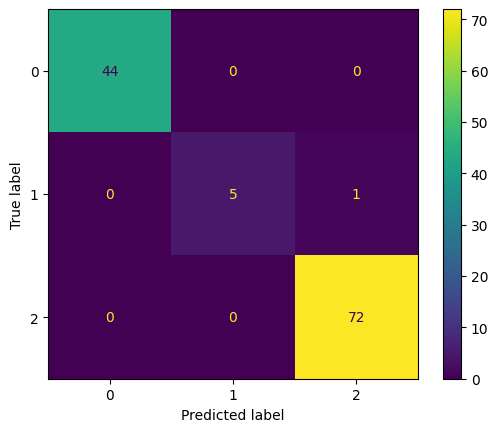

In [171]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

## Best Model is CatBoostClassifier(CatBoost) with Accuracy 99.18%